# FacultyAI hackathon 


## Supervised learning for tweets to predict Tesla Stock prices

Our code looks to investigate whether we can use tweets to predict the market closingn price of tesla. We look to take tweets from the morning at 8am to 12pm and see if we can use it predict where the market will go from 12pm to the day's close. 
We will use a collection of the top 30 most upvoted tweets from the morning and lable them as based of the tesla stock price:
Class 1 -> stock went up from midday to close
Class 0 -> stock went down from midday to close



# # Collecting tweets


We will be using twint to collect tweets from each day, to begin with we create lists of trading dates that we wish to collect tweets from and then run this into twint to collect the tweets of the dates we need.

We will only take tweets from the morning up to midday and then take the 30 most upvoted tweets, this avoids spam tweets and tweets which are unpoular/not veiwed much.

We will end with a dataframe of all tweets from 2014 to 2019

In [27]:
#importing modules we need
import time
import twint
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#needed in order to fix soem bugs in twint
import nest_asyncio
nest_asyncio.apply()


In [36]:
#setting the dates we need to get data from, these are the dates of the year minus the weekeneds and days where the market is closed

#2014
startdate = '2014-01-01'
enddate = '2014-12-31'
dates2014 = pd.date_range(start=startdate,end=enddate)
offdays2014 = list(range(3,365,7)) + list(range(4,365,7)) + [0, 19, 47, 107, 145, 184, 243, 330, 358]
offdays2014.sort()
l2014 = pd.DatetimeIndex.tolist(dates2014)
l2014 = [i for j, i in enumerate(l2014) if j not in offdays2014]
l2014 = [str(i) for i in l2014]

#2015
startdate = '2015-01-01'
enddate = '2015-12-31'
dates2015 = pd.date_range(start=startdate,end=enddate)
offdays2015 = list(range(2,365,7)) + list(range(3,365,7)) + [0, 18, 46, 93, 145, 184, 185, 250, 330, 359]
offdays2015.sort()
l2015 = pd.DatetimeIndex.tolist(dates2015)
l2015 = [i for j, i in enumerate(l2015) if j not in offdays2015]
l2015 = [str(i) for i in l2015]

#2016
startdate = '2016-01-01'
enddate = '2016-12-31'
dates2016 = pd.date_range(start=startdate,end=enddate)
offdays2016 = list(range(1,366,7)) + list(range(2,366,7)) + [0, 17, 45, 84, 150, 185, 248, 328, 359]
offdays2016.sort()
l2016 = pd.DatetimeIndex.tolist(dates2016)
l2016 = [i for j, i in enumerate(l2016) if j not in offdays2016]
l2016 = [str(i) for i in l2016]

#2017
startdate = '2017-01-01'
enddate = '2017-12-31'
dates2017 = pd.date_range(start=startdate,end=enddate)
offdays2017 = list(range(6,365,7)) + list(range(7,365,7)) + [0, 1, 15, 50, 103, 148, 184, 246, 326, 358]
offdays2017.sort()
l2017 = pd.DatetimeIndex.tolist(dates2017)
l2017 = [i for j, i in enumerate(l2017) if j not in offdays2017]
l2017 = [str(i) for i in l2017]

#2018
startdate = '2018-01-01'
enddate = '2018-12-31'
dates2018 = pd.date_range(start=startdate,end=enddate)
offdays2018 = list(range(5, 365, 7)) + list(range(6, 365, 7)) + [0, 14, 49, 88, 147, 184, 245, 325, 338, 358]
offdays2018.sort()
l2018 = pd.DatetimeIndex.tolist(dates2018)
l2018 = [i for j, i in enumerate(l2018) if j not in offdays2018]
l2018 = [str(i) for i in l2018]

#2019
startdate = '2019-01-01'
enddate = '2019-12-31'
dates2019 = pd.date_range(start=startdate,end=enddate)
offdays2019 = list(range(4,365,7)) + list(range(5,365,7)) + [0, 20, 48, 108, 146, 184, 244, 331, 358]
offdays2019.sort()
l2019 = pd.DatetimeIndex.tolist(dates2019)
l2019 = [i for j, i in enumerate(l2019) if j not in offdays2019]
l2019 = [str(i) for i in l2019]





In [37]:

dates = l2018

#creating empty dataframes to put out tweets int
df1 = pd.DataFrame()
full_tweets = pd.DataFrame()
none_dates = pd.DataFrame()


In [ ]:
#for looop over the days to get the tweets we want
i = 0
while i < (len(dates)-1):
#while i < 1:

    c = twint.Config()


    i1 = i + 1 

    c.Until = str(dates[i1])
    c.Since = str(dates[i])
    
  
    print(c.Since)
    c.Lang = "en"
    

    #up to 1000 tweets a day
    c.Limit = 1000
    #with terms 'tesla'
    c.Search = ['tesla']
    #with at least 3 likes
    c.Min_likes = 3
    c.Pandas = True
    c.Hide_output = True


    
    # Run
    twint.run.Search(c)
    Tweets_df = twint.storage.panda.Tweets_df
    Tweets_df1 = Tweets_df

    #only taking useful columns 
    Tweets_df = Tweets_df.iloc[:,[3, 6, 7, 15, 22]]
    Tweets_df['hour'] = Tweets_df['hour'].astype(int)
    
    
    
    #we only want the tweets from the morning and not anything in the afternoon so we will use anything from 10am-14pm GMT times
    #the times are in gmt so is relevent to 8-12 in NYSE
    Tweets_df = Tweets_df.loc[(Tweets_df['hour'] <= 14) & (Tweets_df['language'] == 'en')& (Tweets_df['hour'] >= 10)]

    #only takes the top 30 tweets from that time
    Tweets_df = Tweets_df.nlargest(min(len(Tweets_df), 30),'nlikes')

   



    if len(Tweets_df) > 1:
        

        #joins the top tweets and puts them into a database
        headlines = ' '.join(str(x) for x in Tweets_df.iloc[1:len(Tweets_df),1])    
     
        tweets_day = pd.DataFrame({'A':[c.Since],'B':[headlines]})
        
        full_tweets = pd.concat([full_tweets, tweets_day], ignore_index=True, sort=False)
        
        
        #we will still store individual tweets
        df1 = pd.concat([df1, Tweets_df], ignore_index=True, sort=False)



    else:
        
        #we got no tweets necessary
        
        tweets_day = pd.DataFrame({'A':[c.Since],'B':'NA'})
    
        #make a list of days where 
        none_dates = pd.concat([none_dates, tweets_day], ignore_index=True, sort=False)

       
        # print days where we didn't have tweets
        print('NOT', c.Since)


    i += 1

    
    


In [39]:
#pickling everythign to be store for later 
df1.to_pickle('tww_2018_2.pkl')
full_tweets.to_pickle('ft2018.pkl')
none_dates.to_pickle('none_2018.pkl')

#look at output for 2014
td1


,date,tweet,language,hour,nlikes
0,2014-01-02 11:44:17,Tesla's ideas are a threat to #BigOil http://...,en,11,18
1,2014-01-02 10:02:21,Zevenaar Supercharger: The other Tesla drives ...,en,10,2
2,2014-01-05 11:28:04,Congratulations to @PandoDaily on its acquisit...,en,11,7
3,2014-01-03 12:02:23,"It's hailing so, much like Stana, I'm going to...",en,12,5
4,2014-01-05 12:30:46,Smart move by @elonmusk to hire @hamishmackenz...,en,12,4
...,...,...,...,...,...
2662,2014-12-30 14:56:14,.@YahooFinance is counting down the most searc...,en,14,4
2663,2014-12-30 14:20:04,Why Nikola Tesla Was the Greatest Geek who Eve...,en,14,4
2664,2014-12-30 10:39:36,No small piece of work ! Super Charge us ! Fea...,en,10,3
2665,2014-12-30 12:04:40,#Tesla's new sports car is even greener than t...,en,12,1


# # Textblob and cleaning tweets

We will use the tweets from 2014 -2019 to get exploartory analysis of the polarity of them and if they have changed over time. WE need to clean the data first

In [110]:
#usign textblob polarity to get initial sentiment
# read in csv file to pandas dataframe and save as pickle file
#td = pd.read_pickle('tf1.pkl')
td1 = pd.read_pickle('tww_2014_2.pkl')
td2 = pd.read_pickle('tww_2015_2.pkl')
td3 = pd.read_pickle('tww_2016_2.pkl')
td4 = pd.read_pickle('tww_2017_2.pkl')
td4_5 = pd.read_pickle('tww_2018_2.pkl')
td5 = pd.read_pickle('tww_2019_2.pkl')


In [111]:
training_data = pd.DataFrame()
#training_data = pd.concat([training_data, td0], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td1], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td2], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td3], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td4], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td4_5], ignore_index=True, sort=False)
training_data = pd.concat([training_data, td5], ignore_index=True, sort=False)
#training_data.columns = [ 'a', 'tweet']


data = training_data

In [8]:
#our data is messy and needs to be cleaned
data

,date,tweet,language,hour,nlikes
0,2014-01-02 11:44:17,Tesla's ideas are a threat to #BigOil http://...,en,11,18
1,2014-01-02 10:02:21,Zevenaar Supercharger: The other Tesla drives ...,en,10,2
2,2014-01-05 11:28:04,Congratulations to @PandoDaily on its acquisit...,en,11,7
3,2014-01-03 12:02:23,"It's hailing so, much like Stana, I'm going to...",en,12,5
4,2014-01-05 12:30:46,Smart move by @elonmusk to hire @hamishmackenz...,en,12,4
...,...,...,...,...,...
28269,2019-12-30 14:59:34,“One day a vehicle will be named after me for ...,en,14,13
28270,2019-12-30 14:37:47,"@GregWil82228158 @PaulMaric All this is, is is...",en,14,13
28271,2019-12-30 14:47:12,The thing about #Autopilot that haters ‘cannot...,en,14,12
28272,2019-12-30 14:51:05,$TSLA Tesla to miss delivery forecast and stoc...,en,14,11


In [112]:
#removes links and @ from the tweets

import re,string


def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)



def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    #removes all stuff in square brackets
    text = re.sub('\[.*?\]', '', text)
    #remove puctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove numbers /w alpha numeric removes all numbers
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[\n]', '', text)
    return text

round1 = lambda x: clean_text_round1(x)


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    #remove line breaks
    text = re.sub('\n', '', text)
    text= re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = re.sub('rt', '', text)
    return text




round2 = lambda x: clean_text_round2(x)




    
data_clean = pd.DataFrame(data.tweet.apply(strip_links))
data_clean = pd.DataFrame(data_clean.tweet.apply(strip_all_entities))

data_clean = pd.DataFrame(data_clean.tweet.apply(round1))

data_clean = pd.DataFrame(data_clean.tweet.apply(round2))
data_clean



#our tweets and indexes are now clean


,tweet
0,tesla s ideas are a threat to
1,zevenaar supercharger the other tesla drives n...
2,congratulations to on its acquisition by tesla
3,it s hailing so much like stana i m going to h...
4,sma move by to hire to tell stories about bran...
...,...
35589,one day a vehicle will be named after me for t...
35590,all this is is is advanced cruise control and ...
35591,the thing about that haters cannot seem to und...
35592,tsla tesla to miss delivery forecast and stock...


In [7]:
#data_clean.to_csv('data_clean.csv')


In [113]:
#add dates column from before to this new column
data_clean['new_date'] = data['date'].str[:10]
data_clean

,tweet,new_date
0,tesla s ideas are a threat to,2014-01-02
1,zevenaar supercharger the other tesla drives n...,2014-01-02
2,congratulations to on its acquisition by tesla,2014-01-05
3,it s hailing so much like stana i m going to h...,2014-01-03
4,sma move by to hire to tell stories about bran...,2014-01-05
...,...,...
35589,one day a vehicle will be named after me for t...,2019-12-30
35590,all this is is is advanced cruise control and ...,2019-12-30
35591,the thing about that haters cannot seem to und...,2019-12-30
35592,tsla tesla to miss delivery forecast and stock...,2019-12-30


In [114]:
#applying textblob for polarity analysis

# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['tweet'].apply(pol)
data_clean['subjectivity'] = data_clean['tweet'].apply(sub)


In [115]:
data_clean


,tweet,new_date,polarity,subjectivity
0,tesla s ideas are a threat to,2014-01-02,0.000000,0.000000
1,zevenaar supercharger the other tesla drives n...,2014-01-02,-0.062500,0.250000
2,congratulations to on its acquisition by tesla,2014-01-05,0.000000,0.000000
3,it s hailing so much like stana i m going to h...,2014-01-03,0.200000,0.200000
4,sma move by to hire to tell stories about bran...,2014-01-05,0.000000,0.000000
...,...,...,...,...
35589,one day a vehicle will be named after me for t...,2019-12-30,0.000000,0.000000
35590,all this is is is advanced cruise control and ...,2019-12-30,0.400000,0.600000
35591,the thing about that haters cannot seem to und...,2019-12-30,0.044444,0.355556
35592,tsla tesla to miss delivery forecast and stock...,2019-12-30,-0.166667,0.166667


In [116]:
#taking polarity averages over teh dates
# so that we have a average for each date
#our data is from 2014 to 2019
avg = pd.pivot_table(data_clean,values='polarity',index='new_date',aggfunc=np.mean)
avg = avg.reset_index()
avg

,new_date,polarity
0,2014-01-02,-0.031250
1,2014-01-03,0.100000
2,2014-01-04,0.500000
3,2014-01-05,0.000000
4,2014-01-06,-0.060937
...,...,...
1914,2019-12-18,0.110803
1915,2019-12-19,0.146358
1916,2019-12-25,0.147932
1917,2019-12-29,0.161791


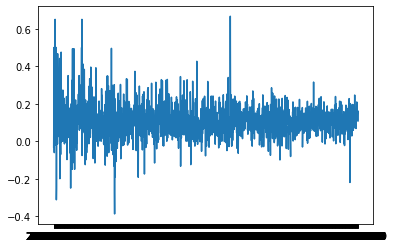

In [117]:
#plot to see hwo sentiment has changed over time for the morning tweets
plt.plot(avg['new_date'],avg['polarity'])

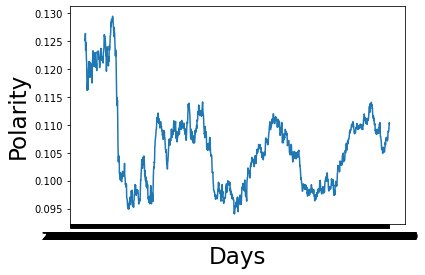

In [142]:
#smoothing out the curve using movign averages
ma2 = avg['polarity'].rolling(window=200).mean()


plt.xlabel('Days', fontsize = 23); plt.ylabel('Polarity', fontsize = 23)

plt.plot(avg['new_date'],ma2)


# Getting Tesla data hourly data

WE are looking to predic stock clsoind at midday so we only need the change in stock price from midday to to the end. For this we use a csv of tesla hourly data call tsla.csv

In [31]:
#we have csv of hourly data for tesla 
#taking a look
sp = pd.read_csv('tsla.csv')
sp

,Time,Open,Last
0,12/31/2019 15:00,84.0118,83.6340
1,12/31/2019 14:00,84.0866,84.0117
2,12/31/2019 13:00,83.7885,84.0880
3,12/31/2019 12:00,83.9720,83.7820
4,12/31/2019 11:00,84.2560,83.9860
...,...,...,...
9995,04/24/2014 15:00,41.5600,41.5580
9996,04/24/2014 14:00,41.3680,41.5600
9997,04/24/2014 13:00,41.6860,41.3600
9998,04/24/2014 12:00,41.5480,41.6760


In [32]:
#we can take the date as a string and add new columns new-date and hour 
#starting at 4/24/2014 and ending at end of 2019
sp['new_date'] = sp['Time'].str[:10]
sp['hr'] = sp['Time'].str[11:13]
sp


,Time,Open,Last,new_date,hr
0,12/31/2019 15:00,84.0118,83.6340,12/31/2019,15
1,12/31/2019 14:00,84.0866,84.0117,12/31/2019,14
2,12/31/2019 13:00,83.7885,84.0880,12/31/2019,13
3,12/31/2019 12:00,83.9720,83.7820,12/31/2019,12
4,12/31/2019 11:00,84.2560,83.9860,12/31/2019,11
...,...,...,...,...,...
9995,04/24/2014 15:00,41.5600,41.5580,04/24/2014,15
9996,04/24/2014 14:00,41.3680,41.5600,04/24/2014,14
9997,04/24/2014 13:00,41.6860,41.3600,04/24/2014,13
9998,04/24/2014 12:00,41.5480,41.6760,04/24/2014,12


In [33]:
# we are predicting the market close price from midday so we need the Open at 12 o clock and last at 15
sp12 = sp.loc[(sp['hr'] == '12' )] 
sp15 = sp.loc[(sp['hr'] == '15' )]
#note length of sp15 is longer than sp12 because of early close dates, so we remove them from our analysis


In [34]:
#taking the difference we can see teh market change for each day 
#we take out early close dates 
early_close_dates = ['12/24/2014','11/28/2014','07/03/2014','12/24/2015','11/27/2015','11/25/2016','11/24/2017',
'12/24/2017','07/03/2017','12/24/2018','11/23/2018','07/03/2018','12/24/2019','11/29/2019','07/03/2019']

sp12 = sp12[-sp12["new_date"].isin(early_close_dates)]
sp12

,Time,Open,Last,new_date,hr
3,12/31/2019 12:00,83.972,83.7820,12/31/2019,12
10,12/30/2019 12:00,83.836,83.7304,12/30/2019,12
17,12/27/2019 12:00,86.225,86.2160,12/27/2019,12
24,12/26/2019 12:00,85.944,86.0660,12/26/2019,12
36,12/23/2019 12:00,84.158,83.8310,12/23/2019,12
...,...,...,...,...,...
9970,04/30/2014 12:00,40.722,41.0202,04/30/2014,12
9977,04/29/2014 12:00,40.398,41.0420,04/29/2014,12
9984,04/28/2014 12:00,38.964,38.8402,04/28/2014,12
9991,04/25/2014 12:00,40.200,39.9200,04/25/2014,12


In [136]:
#reset indicies and find the difference
sp12 = sp12.reset_index(drop = 'true')
sp15 = sp15.reset_index(drop = 'true')

dif = sp15['Last'] - sp12['Open']
#dif.to_csv('dif.csv')
dif


0      -0.338
1      -0.912
2      -0.179
3       0.220
4      -0.322
        ...  
1414    0.840
1415    0.970
1416    0.710
1417   -0.218
1418    0.010
Length: 1419, dtype: float64

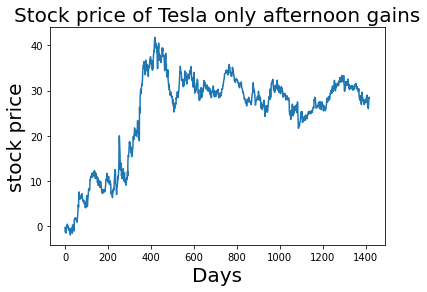

In [143]:
cumsum = dif.cumsum() 
plt.xlabel('Days', fontsize = 20); plt.ylabel('stock price', fontsize = 20)
plt.title('Stock price of Tesla only afternoon gains', fontsize = 20)
plt.plot(cumsum )

In [40]:
#note that we only have tesla stock price data for 04/24/2019 so we must shotern out numeber of tweets to match the dates
avg1 = avg[108:len(data)]
avg1 = avg1.reset_index()
avg1

,index,new_date,polarity
0,108,2014-04-24,0.048254
1,109,2014-04-25,0.098316
2,110,2014-04-26,0.100000
3,111,2014-04-27,0.200000
4,112,2014-04-28,0.000000
...,...,...,...
1531,1639,2019-12-18,0.110803
1532,1640,2019-12-19,0.146358
1533,1641,2019-12-25,0.147932
1534,1642,2019-12-29,0.161791


# Using Randomforest classifiers

In [41]:
#we apply the same clean methods as before and put all the trades from the same day into one table corresponding to the dates from 04/24/2014 to 31/12/19
full_tweets =pd.read_csv('df2_14_19.csv')
full_tweets

,Unnamed: 0,tweet
0,0,bro stripped naked and staed doing weird shit ...
1,1,photo my new car dont need an engine photo my ...
2,2,innovation in aircraft industry the electric p...
3,3,tesla supercharger station now up amp running ...
4,4,here we go first drive with battery car tesla ...
...,...,...
1371,1371,tesla is going to deploy a big battery in alas...
1372,1372,tesla cyberuck gets seal of approval from toug...
1373,1373,i spotted a model y on the way to ksc this mor...
1374,1374,one thousand and eleven tesla cars were regi...


In [42]:
# we can also remove the dates from which we have market data but no tweets to create a list of the differences corresponsding to the dates
# we label the dif as positive or negative based on if the market went up or down and is used as teh classifier
posneg = []
#dropping index of dates we don't have tweets for
for t in [471,472,351,249,292,311,347,497,746,997,1247,1267]:
     dif = dif.drop(index={t})
for t in [0,3,4,5,21,22,23,24,30,31,44,45,60,64,69,209,173, 185, 184, 172, 171, 170, 162, 152, 146, 137, 136, 133, 123, 119, 80]:
     dif = dif.drop(index={t})
dif = pd.Series.to_frame(dif)
for i in dif[0]:
    if i < 0:
        posneg.append(0)
    else:
        posneg.append(1)
dif['pn'] = posneg
dif = dif.drop(columns=[0])
dif = dif.iloc[::-1]
dif.to_csv('difnew.csv')

dif

,pn
1418,1
1417,0
1416,1
1415,1
1414,1
...,...
8,1
7,1
6,1
2,0


In [43]:
#spiltinging into training and test data
#not 0-1158 is 2014 -2018 and anything after is 2019
headlines = []
for row in range(0,1158):
    headlines.append((full_tweets.iloc[row,1]))
headlines





['bro stripped naked and staed doing weird shit on top of his tesla in the middle of traffic yesterday tesla delivers first electric cars to china you may have missed teslas gigafactory gamble why do car dealers and republicans want to eliminate s sales model travis mcknight show off second was poison tesla and warrant at the met first mainroom ice cube del black sheep i d argue it s safer to ride in a tesla than in a yr old crown vic falling apa with driver on shift',
 'photo my new car dont need an engine photo my dashboard is a super sized ipad on steroids my dashboard is a super sized ipad on steroids my dashboard is a supe my dashboard is a super sized ipad on steroids my dashboard is a supe ftc calls the ban on tesla direct sales bad policy morning everybody big democrats jumping off ss obamacare tesla opens in china bill o reilly obama s carbon footprint tesla is a brilliant implementation of the wrong solution to moving people you ve got a friend tesla in the ftc officials say 

In [44]:
test_transform = []
for row in range(1158,1376):
    test_transform.append((full_tweets.iloc[row,1]))

In [45]:
#spilting into traing and testing data
sp18t = dif[0:1158]
sp18tes = dif[1158:1377]

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [106]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
randomclassifier.fit(traindataset,sp18t['pn'])

RandomForestClassifier(criterion='entropy')

In [107]:
## Predict for the Test Dataset
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [108]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [109]:
matrix=confusion_matrix(sp18tes['pn'],predictions)
print(matrix)
score=accuracy_score(sp18tes['pn'],predictions)
print(score)
report=classification_report(sp18tes['pn'],predictions)
print(report)

[[38 60]
 [40 80]]
0.5412844036697247
              precision    recall  f1-score   support

           0       0.49      0.39      0.43        98
           1       0.57      0.67      0.62       120

    accuracy                           0.54       218
   macro avg       0.53      0.53      0.52       218
weighted avg       0.53      0.54      0.53       218



We finish with a f1-score of 54%